In [ ]:
import os
if os.path.exists('Imagenes'):   
    print ('La carpeta ya existe')
else:
    os.system('wget -nc https://www.dropbox.com/s/i80af08mp0y5ux5/Imagenes.zip?dl=1')
    os.system('unzip Imagenes.zip?dl=1')
    os.system('rm -r Imagenes.zip?dl=1')
    print('ImAgenes descargadas')

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Lectura de las imágenes

In [2]:
img = cv2.imread("C:/Users/SANTIAGO/PDI Procesamiento Digital de Imagenes/Unidad 3 - OpenCV/Datasets/1/cell.jpg")
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img2 = cv2.imread("C:/Users/SANTIAGO/PDI Procesamiento Digital de Imagenes/Unidad 3 - OpenCV/Datasets/1/Can1.png")
img2=cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [3]:
print ('Tamanho de las imagenes ', np.shape(img), np.shape(img2))

Tamanho de las imagenes  (720, 960, 3) (800, 1200, 3)


##### Recortar imágenes al mismo tamaño
Las imágenes punto a punto se realizan en imágenes del mismo tamaño, por lo tanto, es necesario recortar las imágenes para garantizar esta condición.

In [4]:
#Recortar imágenes al mismo tamaño
Nimg=img[:720,:960,:]
Nimg2=img2[:720,:960,:]

In [5]:
#Función para graficar dos imágenes
def graficas(x, y):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.imshow(x)
    plt.subplot(1,2,2)
    plt.imshow(y)

#### Imágenes recortadas

In [6]:
graficas(Nimg, Nimg2)
print ('Tipo de dato ', Nimg.dtype, Nimg2.dtype)
print ('Valores maximos ', np.max(Nimg) , np.max(Nimg2))

Tipo de dato  uint8 uint8
Valores maximos  255 255


### Operaciones punto a punto
Las operaciones punto a punto, al ser basicamente operaciones matemáticas, pueden tomar valores superiores a los valores a los permitidos en imágenes de 8 bits.

$$2^{8} = 256\,posibles\,valores $$
$$Valores\,de\,0\,a\,255$$

#### Suma
Aunque la suma podría tomar valores superiores a 255 este valores se ve limitado por el tipo de dato, por lo tanto estamo perdiendo información en este tipo de proceso. Esto no solo aplica para operaciones punto a punto sino a todo tipo de operación con las matrices, como por ejemplo la transformada de Fourier.

In [7]:
Ima=Nimg+Nimg2
plt.imshow(Ima)
print ('Valor maximo ', np.max(Ima))

Valor maximo  255


### Conversión del tipo de dato
Para este caso se realiza una conversión de tipo de dato de 'uint8' a 'float64'.

In [8]:
Ima1=np.array(Nimg, np.dtype('float64'))
Ima2=np.array(Nimg2, np.dtype('float64'))

In [9]:
graficas(Ima1, Ima2)
print ('Tipo de dato ', Ima1.dtype, Ima2.dtype)
print ('Valores maximos ', np.max(Ima1) , np.max(Ima2))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Tipo de dato  float64 float64
Valores maximos  255.0 255.0



No obstante, cuando matplotlib recibe estas imágenes de punto flotante las asume como imágenes normalizadas, por lo tanto, es necesario normalizarla, de lo contrario las imágenes no se verían como se esperaría. 

Las imágenges normalizadas son imágenes donde sus valores están en el rango de 0 y 1. 

La forma facil de normalizar una imagen es dividirla entre su máximo valor.

Opencv únicamente puede graficar imágenes de 8 bits (cv2.imshow('ventana', imagen)), por lo tanto, primero es necesario ajustar los valores de 0 a 255 y después realizar una conversión al tipo de dato 'uint8'

### Normalización de las imágenes

In [10]:
Ima1=Ima1/255
Ima2=Ima2/255

In [11]:
graficas(Ima1, Ima2)
print ('Tipo de dato ', Ima1.dtype, Ima2.dtype)
print ('Valores maximos ', np.max(Ima1) , np.max(Ima2))

Tipo de dato  float64 float64
Valores maximos  1.0 1.0


Ahora que se conocen las consideraciones para trabajar con operaciones punto a punto, podemos continuar con las operaciones básicas

### Operaciones punto a punto

#### Suma

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


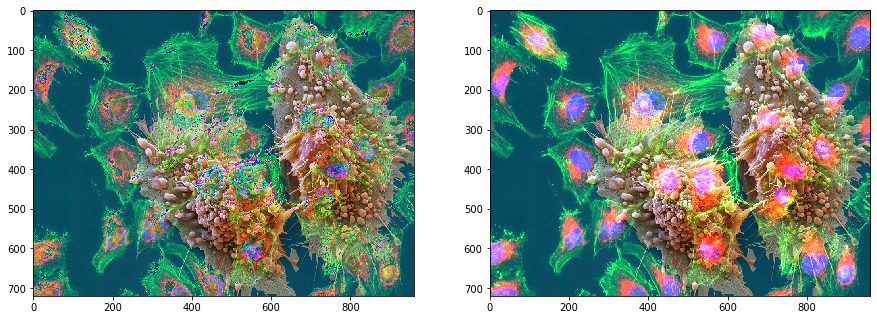

In [12]:
#Imágenes 'uint8'
Res1=Nimg+Nimg2
#Imánges 'float64'
Res2=Ima1+Ima2
graficas(Res1, Res2)

### Resta

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


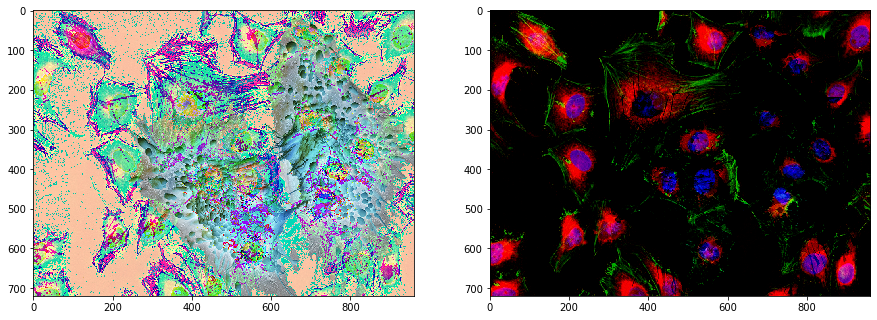

In [13]:
#Imágenes 'uint8'
Res1=Nimg-Nimg2
#Imánges 'float64'
Res2=Ima1-Ima2
graficas(Res1, Res2)

### Multiplicación

In [14]:
#Imágenes 'uint8'
Res1=Nimg*Nimg2
#Imánges 'float64'
Res2=Ima1*Ima2
graficas(Res1, Res2)

### División

C:\Users\SANTIAGO\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\SANTIAGO\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


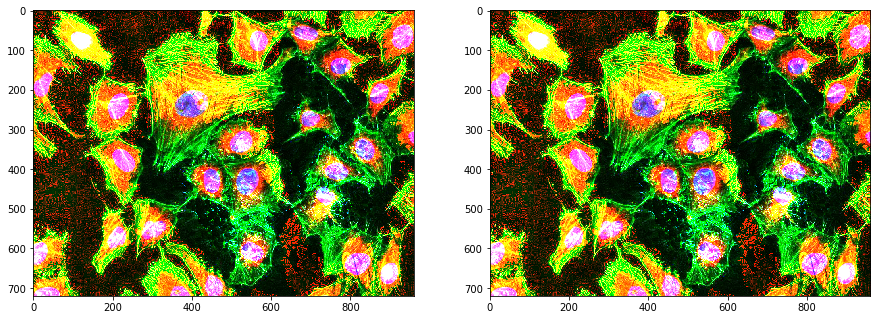

In [15]:
#Imágenes 'uint8'
Res1=Nimg/(Nimg2+1)
#Imánges 'float64'
Res2=Ima1/(Ima2+0.0039)
graficas(Res1, Res2)

### Suma de un escalar

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


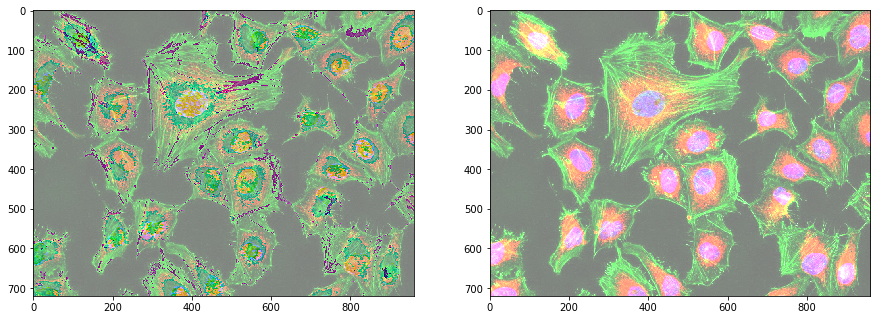

In [16]:
#Imágenes 'uint8'
Res1=Nimg+128
#Imánges 'float64'
Res2=Ima1+0.5
graficas(Res1, Res2)

### Resta de un escalar

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


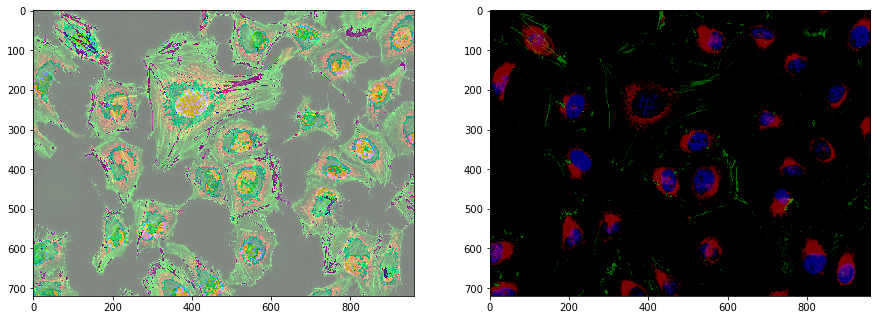

In [17]:
#Imágenes 'uint8'
Res1=Nimg-128
#Imánges 'float64'
Res2=Ima1-0.5
graficas(Res1, Res2)

### Otras operaciones
#### coseno

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


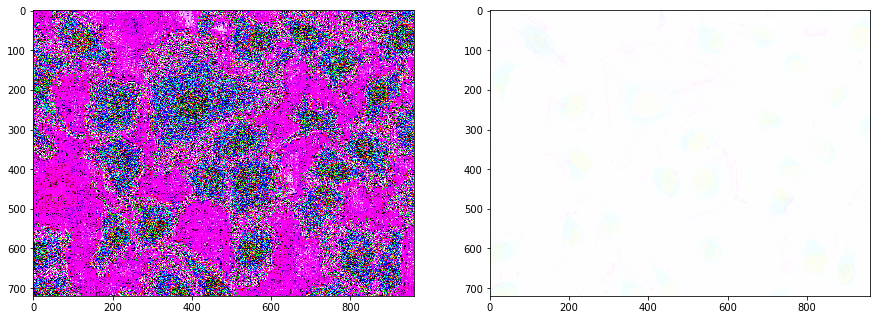

In [18]:
#Imágenes 'uint8'
Res1=np.cos(Nimg/np.pi)
#Imánges 'float64'
Res2=np.cos(Ima1/np.pi)
graficas(Res1, Res2)

#### seno 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


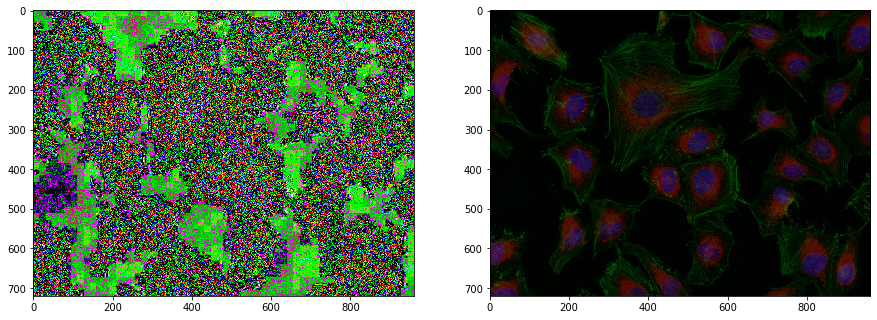

In [19]:
#Imágenes 'uint8'
Res1=np.sin(Nimg/np.pi)
#Imánges 'float64'
Res2=np.sin(Ima1/np.pi)
graficas(Res1, Res2)

In [20]:
#np.tan()
#np.exp()
#np.sqrt()

### Resumen
La imagen de la izquierda son las operaciones punto a punto con las imágenes de tipo 'uint8' y la de la derecha la de tipo 'float64'. 

En las imágenes del lado izquierdo se ven cambios bruscos de color, esto se debe a la perdida de información por el tipo de dato, mientras que las imágenes del lado derecho, al soportar una cantidad de datos mucho mayor, no se ve ese comportamiento, de hecho, las imágenes se ven continuas, lo cual refleja que no hemos perdido información de interés. 